# Kapittel 8

In [2]:
# Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

#Sett skriftstørrelse i plott
plt.rcParams.update({'font.size': 15})

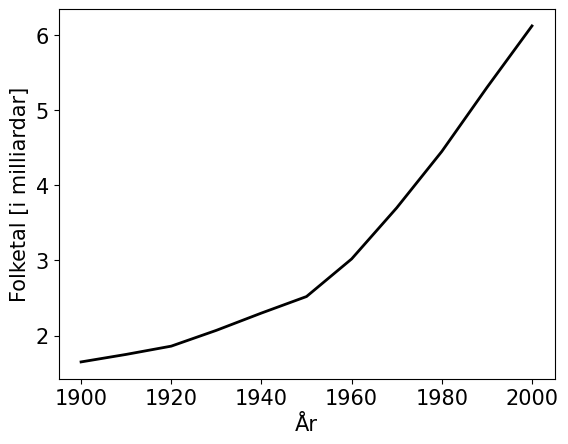

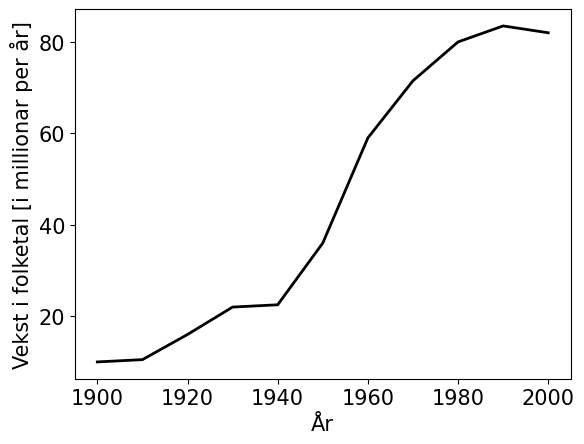

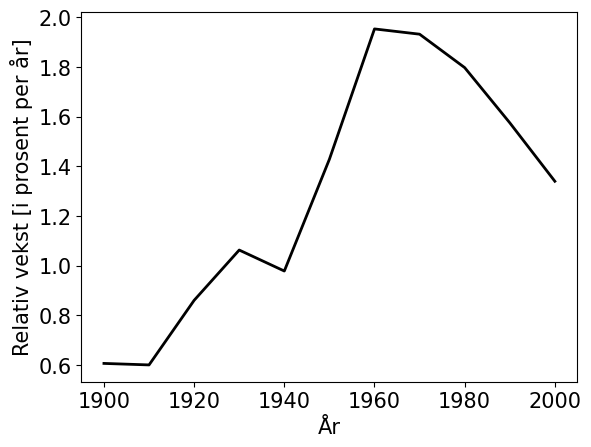

In [4]:
# Skript som lagar plott av folkeveksten på 1900-talet

# Gir vektorar med år og folketal (i milliardar):
h = 10
aar = range(1900, 2001, h)
folk = np.array([1.65, 1.75, 1.86, 2.07, 2.30, 2.52, 3.02, 3.70, 4.45, 5.30, 6.12])

# Plottar folketal
plt.figure()
plt.xlabel('År')
plt.ylabel('Folketal [i milliardar]')
plt.plot(aar, folk, 'k-', linewidth=2)

# Reknar ut dei deriverte
# For år 1900
folk_deriv = np.empty((11))
folk_deriv[0] = (folk[1]-folk[0])/h
# For åra 1910-1990
for n in range(1, 10):
    folk_deriv[n] = (folk[n+1]-folk[n-1])/(2*h)
# For år 2000
folk_deriv[10] = (folk[10]-folk[9])/h

# Plottar vekstfarten
plt.figure()
plt.xlabel('År')
plt.ylabel('Vekst i folketal [i millionar per år]')
# Reknar om til millionar/år
plt.plot(aar, folk_deriv*1e3, 'k-', linewidth=2)

# Plottar relativ vekstfart
plt.figure()
plt.xlabel('År')
plt.ylabel('Relativ vekst [i prosent per år]')
plt.plot(aar, folk_deriv/folk*100, 'k-', linewidth=2)


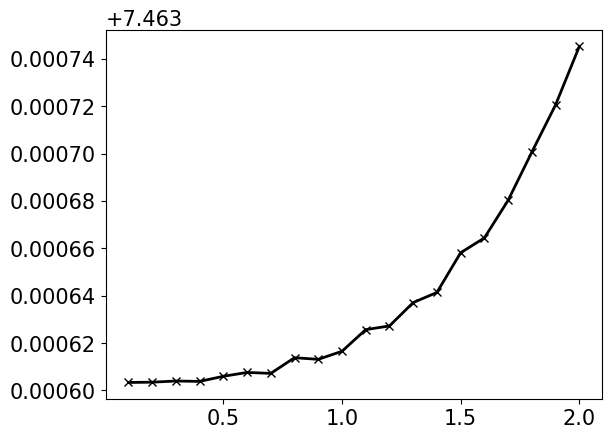

In [10]:
# Skript som bestemmer skjæringspunktet mellom
# eksponentialfunksjonen og gammafunksjonen.
# Til det brukar vi Newtons metode og numerisk derivasjon.
# Skriptet plottar konvergensen av svaret mot h-verdien
# som blir brukt i derivasjonen.

# Gir presisjon og h-verdiane
pres = 1e-5
h_vektor = np.arange(2, 0.0, -0.1)
# Startverdi
x0 = 8

indeks = 0
svar = np.empty_like(h_vektor)

# Bestemmer x ved Newtons metode for kvar av h-verdiane
for h in h_vektor:
    x = x0
    x_gml = 10
    while (abs(x-x_gml) > pres):
        x_gml = x
        # Den deriverte av gamma
        derivert = (gamma(x+h)-gamma(x-h))/(2*h)
        # Iterasjonsformel (Newtons metode)
        x = x-(gamma(x)-np.exp(x))/(derivert-np.exp(x))
    svar[indeks] = x
    indeks = indeks+1

# Plottar løysingane som funksjon av h
plt.plot(h_vektor, svar, 'kx-', linewidth=2)

###################################################
#Denne må forklares med tanke på +7.463 i y-aksen #
###################################################

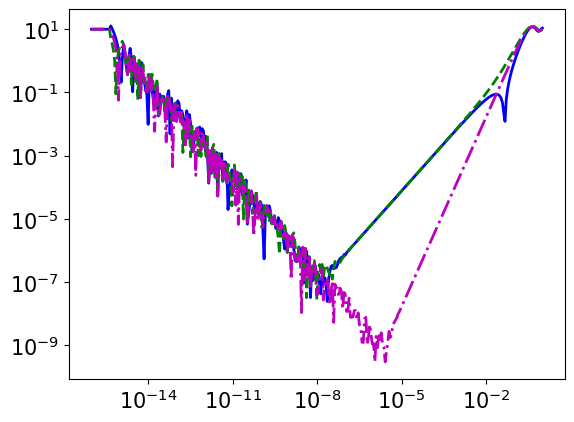

In [12]:
# Skript som plottar feilen i ulike estimat for
# den deriverte.
# Plottet blir laga med logaritmiske aksar.


def f(x):
    """Funksjonen som skal deriverast"""
    return np.sin(x**2)
    
def f_d(x):
    """Den deriverte"""
    return 2*x*np.cos(x**2)

# Argument-verdi
a = 5

# Eksakt svar
derivert = f_d(a)

# Vektor med ulike steglengder
#h = 10**np.arange(0, -18, -1)    # Grov oppdeling
h = 0.9**np.arange(0, 351)        # Fin oppdeling

# Tre estimat: framover-, bakover- og midtpunktsformel
fram_formel = abs((f(a+h)-f(a))/h-derivert)
bak_formel = abs((f(a)-f(a-h))/h-derivert)
midt_formel = abs((f(a+h)-f(a-h))/(2*h)-derivert)

# Plottar feilen med logaritmiske aksar
plt.loglog(h, fram_formel, 'b-', linewidth=2)
plt.loglog(h, bak_formel, 'g--', linewidth=2)
plt.loglog(h, midt_formel, 'm-.', linewidth=2)
#set(gcf,'paperpositionmode','auto')